In [2]:
import shap
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import load
from data_preprocess import preprocess_data

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

In [3]:
rf_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/random_forest_model.pkl")
xgb_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/xgboost_model.pkl")
nn_model = load("C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/non-xai/neural_network_model.pkl")

<font color="bluegrey" size=+1.0><b>Preprocess</b></font>

In [4]:
file_path = 'C:/Users/zen/Documents/-- four/s2/FYP I/XAl-on-healthcare-diagnostics/version_3.0/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

data = data.drop(columns=['id'])

target_column = 'stroke'

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

X_train_processed, X_test_processed, pipeline = preprocess_data(X_train, X_test, categorical_columns, numerical_columns)

Processed Training Data Shape: (4088, 18)
Processed Testing Data Shape: (1022, 18)


<font color="bluegrey" size=+1.0><b>Random Forest</b></font>

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  0%|          | 0/1022 [00:00<?, ?it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  0%|          | 1/1022 [00:00<11:14,  1.51it/s]c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted 

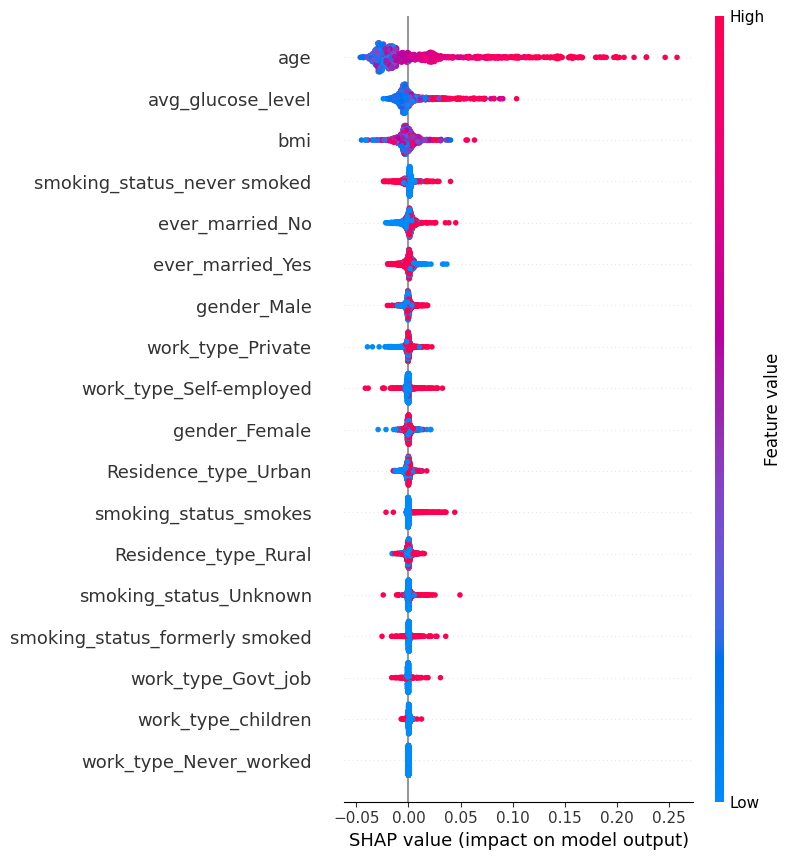

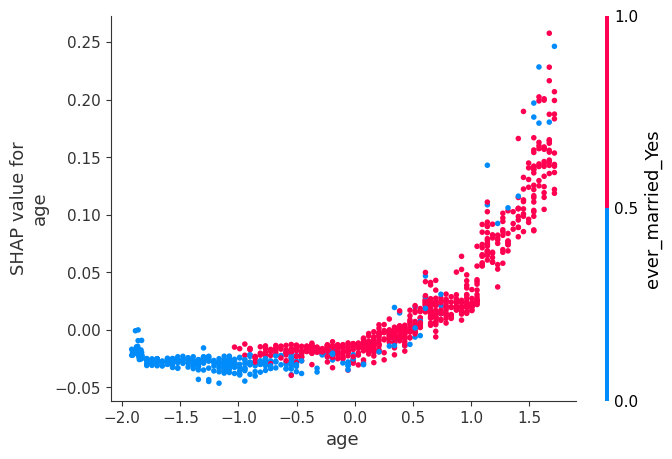

In [8]:
def predict_fn_rf(X):
    return rf_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_rf = shap.KernelExplainer(predict_fn_rf, background_kmeans)

shap_values_rf = explainer_rf.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_rf, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_rf, X_test_processed, feature_names=feature_names)

<font color="bluegrey" size=+1.0><b>XGBoost</b></font>

100%|██████████| 1022/1022 [09:46<00:00,  1.74it/s]


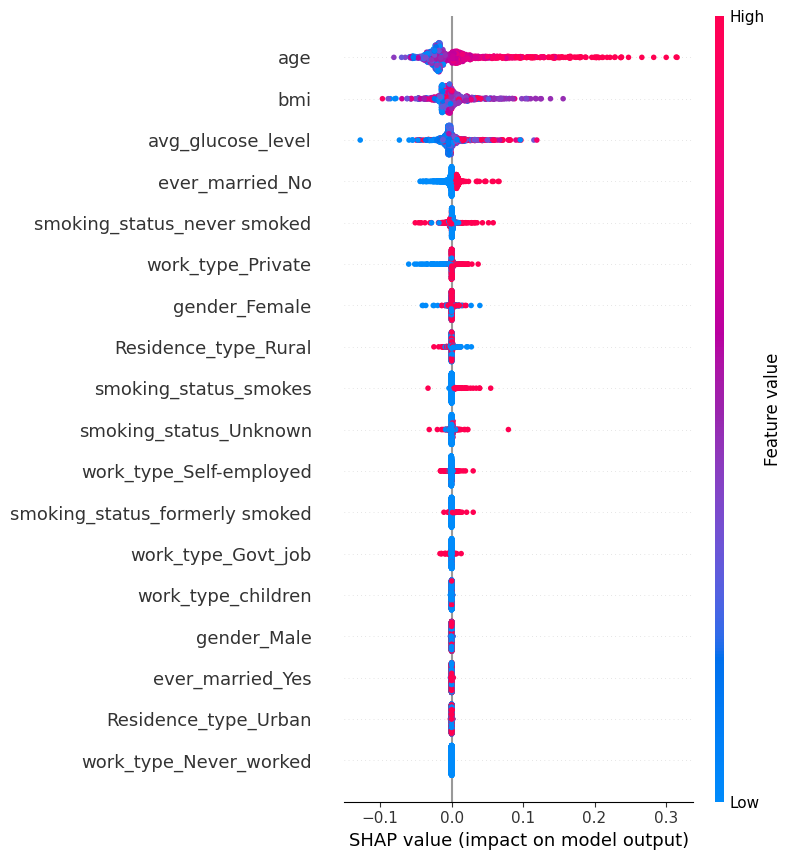

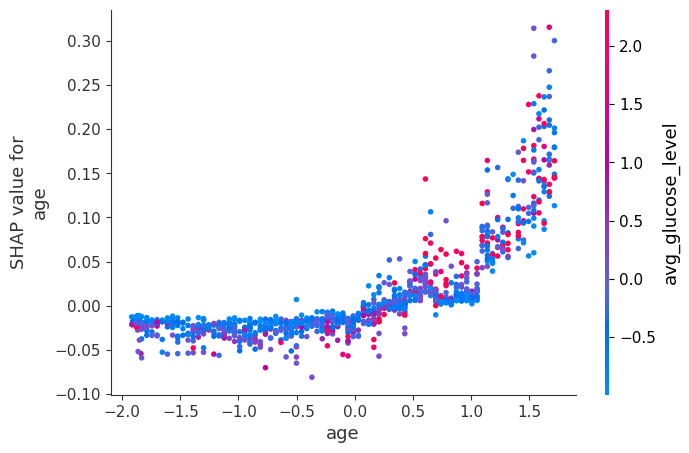

In [9]:
def predict_fn_xgb(X):
    return xgb_model.predict_proba(X)[:, 1]

background_kmeans = shap.kmeans(X_train_processed, 50)  # Create 50 clusters
explainer_xgb = shap.KernelExplainer(predict_fn_xgb, background_kmeans)

shap_values_xgb = explainer_xgb.shap_values(X_test_processed)

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_xgb, X_test_processed, feature_names=feature_names)
# PDP Plot
shap.dependence_plot('age', shap_values_xgb, X_test_processed, feature_names=feature_names)

<font color="bluegrey" size=+1.0><b>Neural Network</b></font>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  0%|          | 0/220 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


  0%|          | 1/220 [00:00<02:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


  1%|          | 2/220 [00:01<02:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


  1%|▏         | 3/220 [00:01<02:14,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


  2%|▏         | 4/220 [00:02<02:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


  2%|▏         | 5/220 [00:03<02:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


  3%|▎         | 6/220 [00:03<02:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


  3%|▎         | 7/220 [00:04<02:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


  4%|▎         | 8/220 [00:05<02:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


  4%|▍         | 9/220 [00:05<02:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


  5%|▍         | 10/220 [00:06<02:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


  5%|▌         | 11/220 [00:07<02:25,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


  5%|▌         | 12/220 [00:07<02:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


  6%|▌         | 13/220 [00:08<02:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


  6%|▋         | 14/220 [00:09<02:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


  7%|▋         | 15/220 [00:09<02:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


  7%|▋         | 16/220 [00:10<02:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


  8%|▊         | 17/220 [00:10<02:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


  8%|▊         | 18/220 [00:11<02:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


  9%|▊         | 19/220 [00:12<02:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


  9%|▉         | 20/220 [00:12<02:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


 10%|▉         | 21/220 [00:13<02:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


 10%|█         | 22/220 [00:14<02:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


 10%|█         | 23/220 [00:14<02:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


 11%|█         | 24/220 [00:15<02:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


 11%|█▏        | 25/220 [00:15<02:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


 12%|█▏        | 26/220 [00:16<02:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


 12%|█▏        | 27/220 [00:17<02:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 13%|█▎        | 28/220 [00:17<02:02,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 13%|█▎        | 29/220 [00:18<02:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


 14%|█▎        | 30/220 [00:19<01:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


 14%|█▍        | 31/220 [00:19<01:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


 15%|█▍        | 32/220 [00:20<01:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


 15%|█▌        | 33/220 [00:20<01:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


 15%|█▌        | 34/220 [00:21<01:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step


 16%|█▌        | 35/220 [00:22<02:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


 16%|█▋        | 36/220 [00:22<01:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 17%|█▋        | 37/220 [00:23<01:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


 17%|█▋        | 38/220 [00:24<01:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


 18%|█▊        | 39/220 [00:24<01:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


 18%|█▊        | 40/220 [00:25<01:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


 19%|█▊        | 41/220 [00:26<01:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


 19%|█▉        | 42/220 [00:26<01:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


 20%|█▉        | 43/220 [00:27<01:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 20%|██        | 44/220 [00:28<01:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


 20%|██        | 45/220 [00:28<01:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


 21%|██        | 46/220 [00:29<01:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


 21%|██▏       | 47/220 [00:29<01:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


 22%|██▏       | 48/220 [00:30<01:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


 22%|██▏       | 49/220 [00:31<01:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


 23%|██▎       | 50/220 [00:31<01:45,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


 23%|██▎       | 51/220 [00:32<01:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


 24%|██▎       | 52/220 [00:32<01:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


 24%|██▍       | 53/220 [00:33<01:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


 25%|██▍       | 54/220 [00:34<01:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


 25%|██▌       | 55/220 [00:34<01:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


 25%|██▌       | 56/220 [00:35<01:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


 26%|██▌       | 57/220 [00:36<01:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


 26%|██▋       | 58/220 [00:36<01:42,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 27%|██▋       | 59/220 [00:38<02:25,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 27%|██▋       | 60/220 [00:38<02:11,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


 28%|██▊       | 61/220 [00:39<02:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


 28%|██▊       | 62/220 [00:40<01:57,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


 29%|██▊       | 63/220 [00:40<01:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


 29%|██▉       | 64/220 [00:41<01:46,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


 30%|██▉       | 65/220 [00:42<01:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


 30%|███       | 66/220 [00:42<01:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


 30%|███       | 67/220 [00:43<01:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step


 31%|███       | 68/220 [00:44<01:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


 31%|███▏      | 69/220 [00:44<01:42,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


 32%|███▏      | 70/220 [00:45<01:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


 32%|███▏      | 71/220 [00:46<01:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


 33%|███▎      | 72/220 [00:47<01:46,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


 33%|███▎      | 73/220 [00:47<01:45,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


 34%|███▎      | 74/220 [00:48<01:42,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


 34%|███▍      | 75/220 [00:49<01:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


 35%|███▍      | 76/220 [00:49<01:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


 35%|███▌      | 77/220 [00:50<01:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


 35%|███▌      | 78/220 [00:51<01:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


 36%|███▌      | 79/220 [00:51<01:31,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


 36%|███▋      | 80/220 [00:52<01:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


 37%|███▋      | 81/220 [00:52<01:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


 37%|███▋      | 82/220 [00:53<01:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


 38%|███▊      | 83/220 [00:54<01:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


 38%|███▊      | 84/220 [00:54<01:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 39%|███▊      | 85/220 [00:55<01:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


 39%|███▉      | 86/220 [00:56<01:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 40%|███▉      | 87/220 [00:56<01:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step


 40%|████      | 88/220 [00:57<01:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


 40%|████      | 89/220 [00:58<01:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


 41%|████      | 90/220 [00:58<01:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


 41%|████▏     | 91/220 [00:59<01:22,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


 42%|████▏     | 92/220 [00:59<01:21,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


 42%|████▏     | 93/220 [01:00<01:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


 43%|████▎     | 94/220 [01:01<01:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


 43%|████▎     | 95/220 [01:02<01:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


 44%|████▎     | 96/220 [01:02<01:29,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step


 44%|████▍     | 97/220 [01:03<01:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step


 45%|████▍     | 98/220 [01:04<01:27,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


 45%|████▌     | 99/220 [01:04<01:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step


 45%|████▌     | 100/220 [01:05<01:22,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


 46%|████▌     | 101/220 [01:06<01:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step


 46%|████▋     | 102/220 [01:07<01:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


 47%|████▋     | 103/220 [01:07<01:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


 47%|████▋     | 104/220 [01:08<01:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


 48%|████▊     | 105/220 [01:08<01:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


 48%|████▊     | 106/220 [01:09<01:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step


 49%|████▊     | 107/220 [01:10<01:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 49%|████▉     | 108/220 [01:10<01:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


 50%|████▉     | 109/220 [01:11<01:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


 50%|█████     | 110/220 [01:12<01:13,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


 50%|█████     | 111/220 [01:12<01:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


 51%|█████     | 112/220 [01:13<01:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


 51%|█████▏    | 113/220 [01:14<01:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


 52%|█████▏    | 114/220 [01:14<01:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 52%|█████▏    | 115/220 [01:15<01:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


 53%|█████▎    | 116/220 [01:15<01:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


 53%|█████▎    | 117/220 [01:16<01:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


 54%|█████▎    | 118/220 [01:17<01:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


 54%|█████▍    | 119/220 [01:17<01:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


 55%|█████▍    | 120/220 [01:18<01:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


 55%|█████▌    | 121/220 [01:18<01:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


 55%|█████▌    | 122/220 [01:19<01:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


 56%|█████▌    | 123/220 [01:20<00:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


 56%|█████▋    | 124/220 [01:20<00:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


 57%|█████▋    | 125/220 [01:21<00:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step


 57%|█████▋    | 126/220 [01:22<01:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


 58%|█████▊    | 127/220 [01:22<01:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


 58%|█████▊    | 128/220 [01:23<01:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


 59%|█████▊    | 129/220 [01:24<01:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


 59%|█████▉    | 130/220 [01:24<00:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


 60%|█████▉    | 131/220 [01:25<00:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


 60%|██████    | 132/220 [01:26<00:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


 60%|██████    | 133/220 [01:26<00:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


 61%|██████    | 134/220 [01:27<00:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


 61%|██████▏   | 135/220 [01:27<00:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


 62%|██████▏   | 136/220 [01:28<00:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


 62%|██████▏   | 137/220 [01:29<00:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


 63%|██████▎   | 138/220 [01:29<00:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


 63%|██████▎   | 139/220 [01:30<00:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


 64%|██████▎   | 140/220 [01:30<00:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


 64%|██████▍   | 141/220 [01:31<00:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


 65%|██████▍   | 142/220 [01:32<00:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


 65%|██████▌   | 143/220 [01:32<00:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


 65%|██████▌   | 144/220 [01:33<00:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


 66%|██████▌   | 145/220 [01:34<00:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 66%|██████▋   | 146/220 [01:34<00:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 67%|██████▋   | 147/220 [01:35<00:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


 67%|██████▋   | 148/220 [01:36<00:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


 68%|██████▊   | 149/220 [01:36<00:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 68%|██████▊   | 150/220 [01:37<00:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


 69%|██████▊   | 151/220 [01:38<00:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


 69%|██████▉   | 152/220 [01:38<00:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 70%|██████▉   | 153/220 [01:39<00:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step


 70%|███████   | 154/220 [01:39<00:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


 70%|███████   | 155/220 [01:40<00:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step


 71%|███████   | 156/220 [01:41<00:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


 71%|███████▏  | 157/220 [01:42<00:42,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step


 72%|███████▏  | 158/220 [01:42<00:41,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step


 72%|███████▏  | 159/220 [01:43<00:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


 73%|███████▎  | 160/220 [01:44<00:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


 73%|███████▎  | 161/220 [01:44<00:43,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


 74%|███████▎  | 162/220 [01:45<00:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 74%|███████▍  | 163/220 [01:46<00:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


 75%|███████▍  | 164/220 [01:46<00:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


 75%|███████▌  | 165/220 [01:47<00:36,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


 75%|███████▌  | 166/220 [01:48<00:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


 76%|███████▌  | 167/220 [01:48<00:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


 76%|███████▋  | 168/220 [01:49<00:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 77%|███████▋  | 169/220 [01:50<00:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


 77%|███████▋  | 170/220 [01:50<00:33,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


 78%|███████▊  | 171/220 [01:51<00:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


 78%|███████▊  | 172/220 [01:52<00:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


 79%|███████▊  | 173/220 [01:52<00:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


 79%|███████▉  | 174/220 [01:53<00:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


 80%|███████▉  | 175/220 [01:53<00:28,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


 80%|████████  | 176/220 [01:54<00:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


 80%|████████  | 177/220 [01:55<00:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


 81%|████████  | 178/220 [01:55<00:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


 81%|████████▏ | 179/220 [01:56<00:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


 82%|████████▏ | 180/220 [01:57<00:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


 82%|████████▏ | 181/220 [01:57<00:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 83%|████████▎ | 182/220 [01:58<00:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


 83%|████████▎ | 183/220 [01:59<00:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 84%|████████▎ | 184/220 [01:59<00:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


 84%|████████▍ | 185/220 [02:00<00:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


 85%|████████▍ | 186/220 [02:01<00:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 85%|████████▌ | 187/220 [02:01<00:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


 85%|████████▌ | 188/220 [02:02<00:20,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


 86%|████████▌ | 189/220 [02:02<00:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


 86%|████████▋ | 190/220 [02:03<00:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


 87%|████████▋ | 191/220 [02:04<00:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


 87%|████████▋ | 192/220 [02:04<00:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


 88%|████████▊ | 193/220 [02:05<00:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


 88%|████████▊ | 194/220 [02:06<00:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


 89%|████████▊ | 195/220 [02:06<00:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


 89%|████████▉ | 196/220 [02:07<00:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


 90%|████████▉ | 197/220 [02:08<00:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


 90%|█████████ | 198/220 [02:08<00:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


 90%|█████████ | 199/220 [02:09<00:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


 91%|█████████ | 200/220 [02:09<00:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step


 91%|█████████▏| 201/220 [02:10<00:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


 92%|█████████▏| 202/220 [02:11<00:11,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


 92%|█████████▏| 203/220 [02:11<00:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


 93%|█████████▎| 204/220 [02:12<00:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


 93%|█████████▎| 205/220 [02:13<00:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


 94%|█████████▎| 206/220 [02:14<00:09,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


 94%|█████████▍| 207/220 [02:14<00:08,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


 95%|█████████▍| 208/220 [02:15<00:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


 95%|█████████▌| 209/220 [02:15<00:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


 95%|█████████▌| 210/220 [02:16<00:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


 96%|█████████▌| 211/220 [02:17<00:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


 96%|█████████▋| 212/220 [02:17<00:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


 97%|█████████▋| 213/220 [02:18<00:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


 97%|█████████▋| 214/220 [02:19<00:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


 98%|█████████▊| 215/220 [02:19<00:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


 98%|█████████▊| 216/220 [02:20<00:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


 99%|█████████▊| 217/220 [02:21<00:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


 99%|█████████▉| 218/220 [02:21<00:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


100%|█████████▉| 219/220 [02:22<00:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


100%|██████████| 220/220 [02:23<00:00,  1.54it/s]


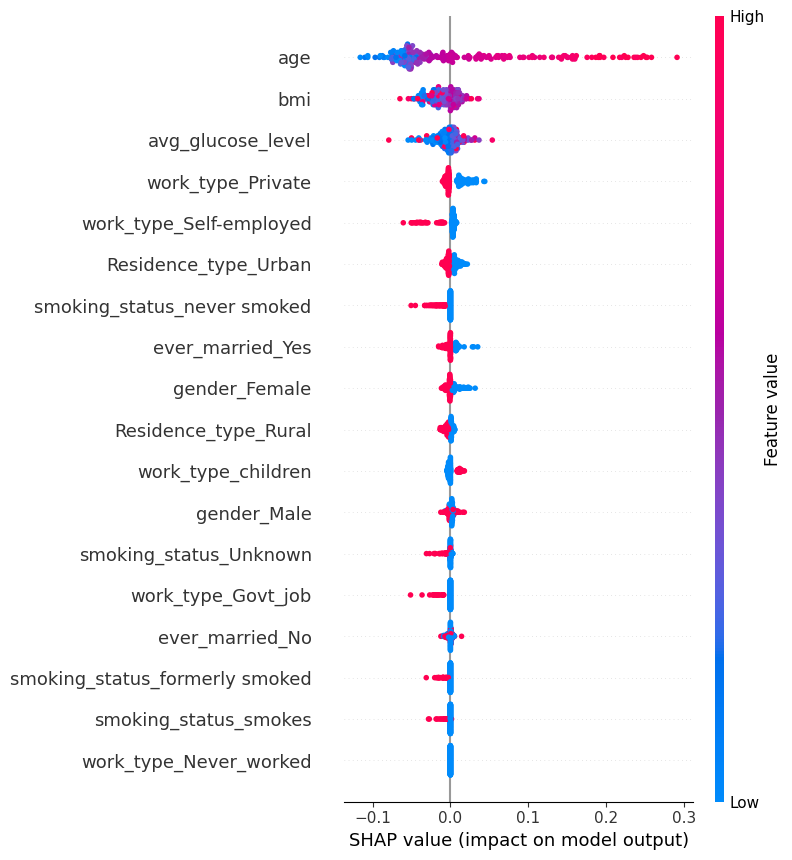

<Figure size 640x480 with 0 Axes>

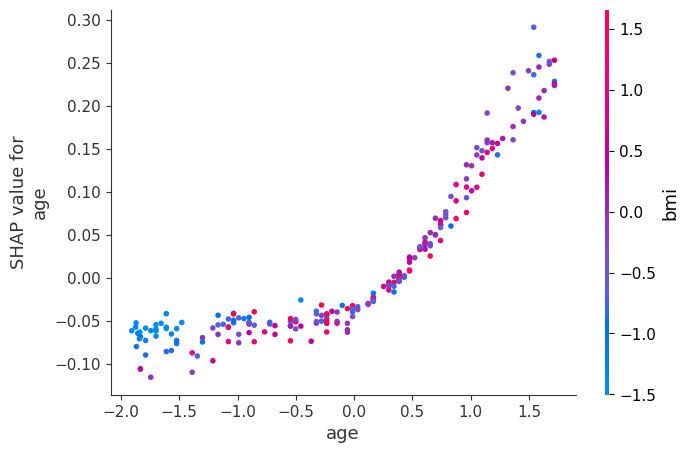

<Figure size 640x480 with 0 Axes>

In [6]:
def predict_fn_nn(X):
    return nn_model.predict(X).ravel()

background_kmeans = shap.kmeans(X_train_processed, 10)  
explainer_nn = shap.KernelExplainer(predict_fn_nn, background_kmeans)

shap_values_nn = explainer_nn.shap_values(X_test_processed[:220])

processed_feature_names = [
    'age', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 
    'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
    'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 
    'smoking_status_Unknown', 'smoking_status_formerly smoked', 
    'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'
]

feature_names = processed_feature_names
shap.summary_plot(shap_values_nn, X_test_processed[:220], feature_names=feature_names)
plt.savefig("nn_summary_plot.png")
# PDP Plot
shap.dependence_plot('age', shap_values_nn, X_test_processed[:220], feature_names=feature_names)
plt.savefig("nn_dependence_plot_age.png")

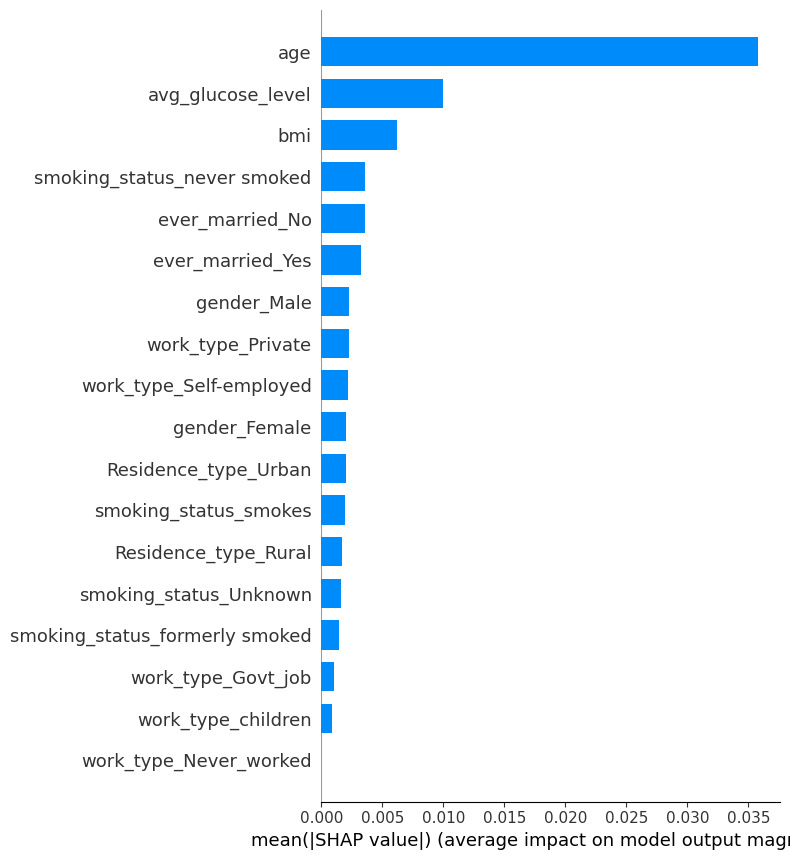

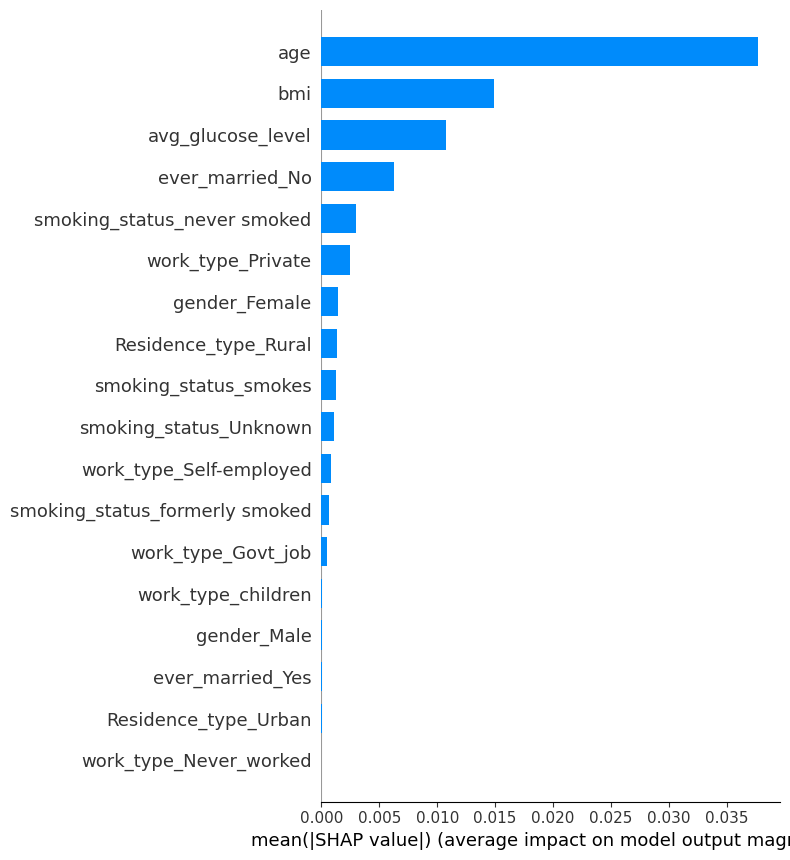

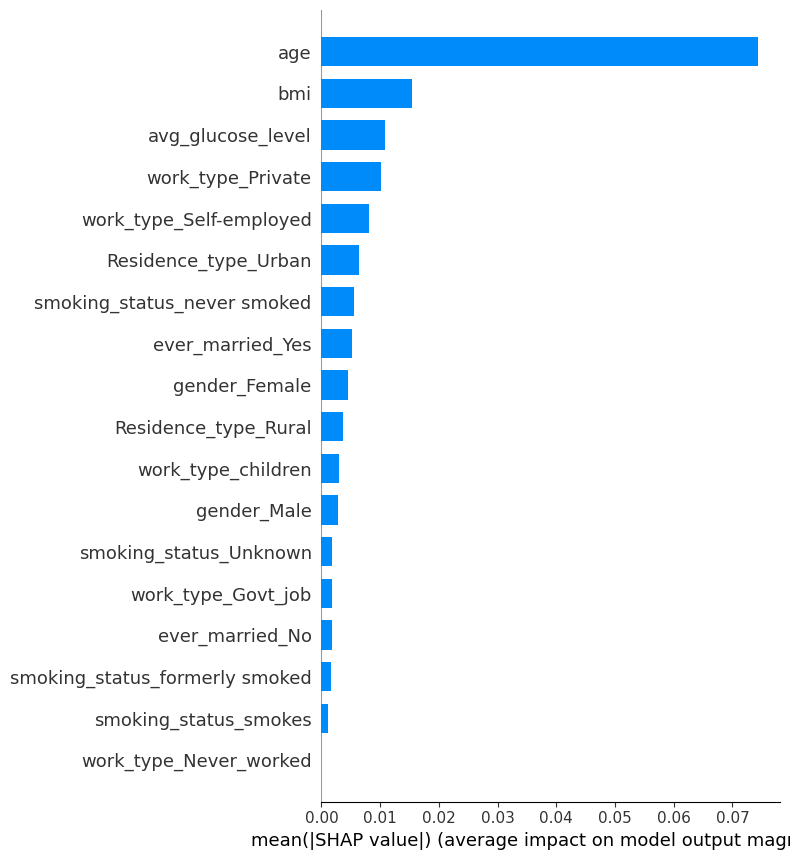

In [10]:
# Feature importance for Random Forest
shap.summary_plot(shap_values_rf, X_test_processed, feature_names=feature_names, plot_type="bar")

# Feature importance for XGBoost
shap.summary_plot(shap_values_xgb, X_test_processed, feature_names=feature_names, plot_type="bar")

# Feature importance for Neural Network
shap.summary_plot(shap_values_nn, X_test_processed, feature_names=feature_names, plot_type="bar")